## Demo Prototipo PAAD

### 1. Disponibilidad de datos en Data Lake

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Data Lake params
silver = './data/silver/stock-prices/'
gold = './data/gold/portfolio-optimization/'
silver_table = 'stock_prices.csv'
gold_table = 'portfolio_optimization.csv'

#### 1.1. Data histórica de precio de acciones (Capa Silver)

In [3]:
# Read data from data lake
silver_data = pd.read_csv(silver+silver_table)
silver_data['Date'] = pd.to_datetime(silver_data['Date'])
silver_data.set_index('Date', inplace=True)
silver_data

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2003-05-21,0.317679,0.323036,0.315536,0.318750,0.270919,305009600,AAPL
2003-05-22,0.319464,0.328571,0.316786,0.325714,0.276838,178460800,AAPL
2003-05-23,0.325179,0.329643,0.320714,0.327143,0.278053,206718400,AAPL
2003-05-27,0.320714,0.337500,0.319821,0.337143,0.286552,290130400,AAPL
2003-05-28,0.330357,0.333214,0.324107,0.326429,0.277446,339679200,AAPL
...,...,...,...,...,...,...,...
2023-05-15,4126.649902,4141.250000,4110.270020,4136.279785,4136.279785,3562170000,^GSPC
2023-05-16,4127.950195,4135.540039,4109.859863,4109.899902,4109.899902,3654200000,^GSPC
2023-05-17,4122.850098,4164.669922,4113.620117,4158.770020,4158.770020,4039080000,^GSPC


#### 1.2. Data histórica + Data predicha (Capa Gold)

In [4]:
# Read data from data lake
data = pd.read_csv(gold+gold_table)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data

,Adj Close,Ticker
Date,,
2003-05-21,0.270919,AAPL
2003-05-22,0.276838,AAPL
2003-05-23,0.278053,AAPL
2003-05-27,0.286552,AAPL
2003-05-28,0.277446,AAPL
...,...,...
2023-05-20,182.318113,TSLA
2023-05-22,181.559613,TSLA
2023-05-21,501.047071,UNH


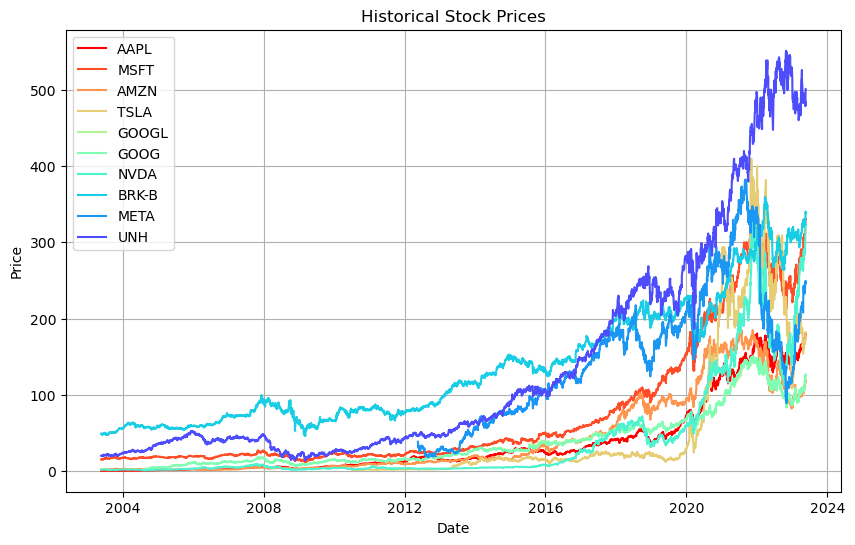

In [5]:
# Function to pivot data
def get_data(data, ticker=['AAPL','MSFT','AMZN','TSLA','GOOGL','GOOG','NVDA','BRK-B','META','UNH']):
    input_data = pd.DataFrame()
    for i in ticker:
        ticker_adj_close = data[data['Ticker']==i]['Adj Close']
        input_data = pd.concat((input_data,ticker_adj_close),axis=1)
    input_data.columns = ticker
    input_data.sort_index(inplace=True)
    return input_data

# Plotting the DataFrame
plt_data = get_data (data)
plt.figure(figsize=(10, 6))

# Generate colors based on a colormap
num_colors = len(plt_data.columns)
colors = cm.rainbow_r([i / num_colors for i in range(num_colors)])

for i, column in enumerate(plt_data.columns):
    plt.plot(plt_data.index, plt_data[column], label=column, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

### 2. Preparación de datos para API

In [6]:
# Reset dataframe index to convert to JSON
data.reset_index(inplace=True)
data.head()

,Date,Adj Close,Ticker
0,2003-05-21,0.270919,AAPL
1,2003-05-22,0.276838,AAPL
2,2003-05-23,0.278053,AAPL
3,2003-05-27,0.286552,AAPL
4,2003-05-28,0.277446,AAPL


In [7]:
# Convert timestamp to string to convert to JSON
data['Date'] = data['Date'].astype('str')
data.head()

,Date,Adj Close,Ticker
0,2003-05-21,0.270919,AAPL
1,2003-05-22,0.276838,AAPL
2,2003-05-23,0.278053,AAPL
3,2003-05-27,0.286552,AAPL
4,2003-05-28,0.277446,AAPL


In [8]:
# Convert dataframe to JSON
json_input = data.to_json()
json_input = json.loads(json_input)
json_input

{'Date': {'0': '2003-05-21',
  '1': '2003-05-22',
  '2': '2003-05-23',
  '3': '2003-05-27',
  '4': '2003-05-28',
  '5': '2003-05-29',
  '6': '2003-05-30',
  '7': '2003-06-02',
  '8': '2003-06-03',
  '9': '2003-06-04',
  '10': '2003-06-05',
  '11': '2003-06-06',
  '12': '2003-06-09',
  '13': '2003-06-10',
  '14': '2003-06-11',
  '15': '2003-06-12',
  '16': '2003-06-13',
  '17': '2003-06-16',
  '18': '2003-06-17',
  '19': '2003-06-18',
  '20': '2003-06-19',
  '21': '2003-06-20',
  '22': '2003-06-23',
  '23': '2003-06-24',
  '24': '2003-06-25',
  '25': '2003-06-26',
  '26': '2003-06-27',
  '27': '2003-06-30',
  '28': '2003-07-01',
  '29': '2003-07-02',
  '30': '2003-07-03',
  '31': '2003-07-07',
  '32': '2003-07-08',
  '33': '2003-07-09',
  '34': '2003-07-10',
  '35': '2003-07-11',
  '36': '2003-07-14',
  '37': '2003-07-15',
  '38': '2003-07-16',
  '39': '2003-07-17',
  '40': '2003-07-18',
  '41': '2003-07-21',
  '42': '2003-07-22',
  '43': '2003-07-23',
  '44': '2003-07-24',
  '45': '200

### 3. Consumo de API

#### 3.1. Comparación de diferentes combinaciones de activos (inyectando datos)

##### 3.1.1. Grupo de activos A: AAPL, MSFT, TSLA, NVDA

In [9]:
# Model request

# Define the URL
url = 'http://ec2-18-217-18-255.us-east-2.compute.amazonaws.com:5000/api'

ticker = 'AAPL,MSFT,TSLA,NVDA'
initial_guess = '0.25,0.25,0.25,0.25'

params = {
    'ticker': ticker,
    'initial_guess': initial_guess
}

# Send the GET request
response = requests.get(url, json=json_input, params=params)

# Print the response
print(json.dumps(json.loads(response.json()), indent=2))

{
  "ticker": [
    "AAPL",
    "MSFT",
    "TSLA",
    "NVDA"
  ],
  "weights": [
    0.7829762673303096,
    3.2526065174565133e-18,
    0.2034358455234544,
    0.013587887146236042
  ],
  "return": 0.33295977093702483,
  "volatility": 0.3208903811230321,
  "sharpe_ratio": 1.037612189470289,
  "input_data": "User data input",
  "data_range": "N/A",
  "message": "Optimization terminated successfully",
  "success": "True"
}


El modelo estima:
- Un Sharpe ratio muy cercano a 1 indica que el portafolio está generando un rendimiento proporcional al nivel de riesgo asumido, sin ofrecer una compensación adicional por asumir dicho riesgo

##### 3.1.2. Grupo de activos B: AMZN, BRK-B, META, UNH

In [10]:
# Model request

# Define the URL
url = 'http://ec2-18-217-18-255.us-east-2.compute.amazonaws.com:5000/api'

ticker = 'AMZN,BRK-B,META,UNH'
initial_guess = '0.25,0.25,0.25,0.25'

params = {
    'ticker': ticker,
    'initial_guess': initial_guess
}

# Send the GET request
response = requests.get(url, json=json_input, params=params)

# Print the response
print(json.dumps(json.loads(response.json()), indent=2))

{
  "ticker": [
    "AMZN",
    "BRK-B",
    "META",
    "UNH"
  ],
  "weights": [
    0.2827303499968077,
    0.2495751566553675,
    0.12384037524211793,
    0.343854118105707
  ],
  "return": 0.16177169853291865,
  "volatility": 0.22760117018315734,
  "sharpe_ratio": 0.7107683075738855,
  "input_data": "User data input",
  "data_range": "N/A",
  "message": "Optimization terminated successfully",
  "success": "True"
}


El modelo estima:
- Un Sharpe ratio menor que 1 implica que el portafolio no estaría generando un rendimiento suficiente para compensar el nivel de riesgo asumido

#### 3.2. Análisis y optimización de carteras de inversión existentes (consumiendo Data Lake delimitando una muestra)

In [11]:
# Model request

# Define the URL
url = 'http://ec2-18-217-18-255.us-east-2.compute.amazonaws.com:5000/api'

ticker = 'NVDA,META'
ini_date = '2022-11-23'
end_date = '2023-05-23'
output_part = '2'

params = {
    'ticker': ticker,
    'ini_date': ini_date,
    'end_date': end_date,
    'output_part': output_part
}

# Send the GET request
response = requests.get(url, params=params)

# Print the response
print(json.dumps(json.loads(response.json()), indent=2))

{
  "ticker": [
    "NVDA",
    "META"
  ],
  "weights": [
    0.3635536942437959,
    0.6364463057562042
  ],
  "return": 1.5215142088125626,
  "volatility": 0.4272274298848228,
  "sharpe_ratio": 3.561368260513495,
  "input_data": "Data Lake",
  "data_range": "2022-11-23 - 2023-05-23",
  "message": "Optimization terminated successfully",
  "success": "True"
}


El modelo estima:
- Un Sharpe ratio de 3.56 sugiere que el portafolio ha logrado un equilibrio favorable entre el rendimiento y el riesgo, y se considera una señal de éxito en la gestión de la cartera. Sin embargo, es importante tener en cuenta que el Sharpe ratio no debe ser el único factor considerado al evaluar un portafolio.

#### 3.3. Otras funcionalidades de la API

In [12]:
# Data tabulation
output_part = '0'

params = {
    'ticker': ticker,
    'ini_date': ini_date,
    'end_date': end_date,
    'output_part': output_part
}

response = requests.get(url, params=params)
pd.read_json(response.json())

,ticker,weights
0,NVDA,0.363554
1,META,0.636446
